#  <center>Machine Learning Lab-2 (week-5)</center>


In [1]:
# Loading of relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### <span style="color: blue"> Regression : A bayessian perspective </span> 


In contrast to other methods, in the Bayesian method the unknown set of parameters are treated as random variables instead of as a set of fixed (yet unknown) values. This was a revolutionary idea, at the time it was introduced by Bayes and later on by Laplace. Treating the underlying set of parameters as random variables, $\boldsymbol{\theta}$, we do not really imply a random nature for them. The associated randomness, in terms of the prior distribution $p(\boldsymbol{\theta})$, encapsulates our uncertainty about their values, prior to receiving any measurements/observations. Stated differently, the prior distribution represents our belief about the different possible values, although only one of them is actually true. From this perspective, probabilities are viewed in a more open-minded way, that is, as measures of uncertainty.


Indeed, given the set of observations, say ${\cal X}$, which are controlled by the unknown set of parameters, we write :

$$
p(\boldsymbol{\theta}|{\cal X}) = \frac{p({\cal X}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{p({\cal X})}
$$

All that is needed for the above inversion is to have a guess about $p(\boldsymbol{\theta})$. This term has brought a lot of controversy in the statistical community for a number of years. However, once a reasonable guess of the prior is available, a number of advantages associated with the Bayesian approach emerge, compared to the *frequentist approach*, which views the parameters deterministically as constants of unknown values. A typical example is the maximum likelihood approach, which estimates the values of the parameters by maximizing $p({\cal X}|\boldsymbol{\theta})$; its value is solely controlled by the obtained observations in a sequence of experiments.



Recall the (generalized) linear regression task, as it was introduced in previous chapters, that is,

$$
    y = \boldsymbol{\theta}^T \boldsymbol{\phi}(\mathbf{x}) +\eta = \theta_0 + \sum_{k=1}^{K-1} \theta_k \phi_k(\mathbf{x}) + \eta
$$

where  $y \in {\cal R}$ is the output random variable, $x \in {\cal R}^l$ is the input random vector, $\eta \in {\cal R}$ is the noise disturbance, $\boldsymbol{\theta} \in {\cal R}^K$ is the unknown parameter vector, and

$$
\boldsymbol{\phi}(\mathbf{x}) := [1, \phi_1(\mathbf{x}),...,\phi_{K-1}(\mathbf{x})]^T
$$

where $\phi_k(\cdot), k=1,...,K-1$, are fixed basis functions (e.g. Gaussians, splines, etc). We are given a set of $N$ output-input points, $(y_n, \mathbf{x}_n), n = 1,2,...,N$. We also assume that the respective noise values, $\eta_n, n = 1,2,...N$ are samples of jointly Gaussian distributed random variables with covariance matrix $\Sigma_{\eta}$ :


$$
    p(\boldsymbol{\eta}) = \frac{1}{(2\pi)^{N/2} |\Sigma_{\eta}|^{1/2}}\exp \bigg(-\frac{1}{2}  \boldsymbol{\eta}^T \Sigma_{\eta}^{-1}  \boldsymbol{\eta}\bigg)
$$


where $\boldsymbol{\eta} = [\eta_1, \eta_2,..., \eta_N]^T$



#### <span style="color: blue"> The Maximum Likelihood Estimator </span> 

$$
    \hat{\boldsymbol{\theta}}_{ML} = \big(\boldsymbol{\Phi}^T {\Sigma}_{\eta}^{-1} \boldsymbol{\Phi}\big)^{-1}\boldsymbol{\Phi}^T {\Sigma}_{\eta}^{-1} \mathbf{y}
$$
In the maximum likelihood (ML) method the unknown parameter is treated as a deterministic variable $\boldsymbol{\theta}$, which parameterizes the pdf describing the output vector of observations:

$$
    \mathbf{y} = \boldsymbol{\Phi}\boldsymbol{\theta} + \boldsymbol{\eta}
$$

where 

$$
\boldsymbol{\Phi} =\begin{bmatrix}
                        \boldsymbol{\phi}^T(\mathbf{x}_1)\\
                        \boldsymbol{\phi}^T(\mathbf{x}_2)\\
                        \vdots\\
                        \boldsymbol{\phi}^T(\mathbf{x}_N)\\
                    \end{bmatrix}
$$

and

$$
    \mathbf{y}  = [y_1, y_2,...,y_N]^T
$$

The ML estimate is given by:


$$
    \hat{\boldsymbol{\theta}}_{ML} = \big(\boldsymbol{\Phi}^T {\Sigma}_{\eta}^{-1} \boldsymbol{\Phi}\big)^{-1}\boldsymbol{\Phi}^T {\Sigma}_{\eta}^{-1} \mathbf{y}
$$

which for the case simple case of uncorrelated noise samples of equal variance $\sigma_{\eta}^2$   $(\Sigma_{\eta}= \sigma_{\eta}^2 I)$ becomes identical to the least-squares solution;

$$
    \hat{\boldsymbol{\theta}}_{ML} = \big(\boldsymbol{\Phi}^T \boldsymbol{\Phi}\big)^{-1}\boldsymbol{\Phi}^T\mathbf{y}
$$

As discussed already, a major drawback of the ML approach is that it is vulnerable to overfitting.



#### <span style="color: blue"> The MAP Estimator </span> 

According to the maximum a posteriori probability (MAP) method, the unknown set of parameters is treated as a random vector $\boldsymbol{\theta}$ and its posterior, for a given set of output observations, $\mathbf{y}$, is expressed as 

$$
    p(\boldsymbol{\theta}|\mathbf{y}) = \frac{p(\mathbf{y}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{p(\mathbf{y})}
$$

where $p(\boldsymbol{\theta})$ is the associated pdf. The dependence on ${\cal X}$ has been eliminated for simplicity. Also note that the input set, ${\cal X} = \{\mathbf{x}_1,...,\mathbf{x}_N\}$, so all the randomness associated with $\mathbf{y}$ is due to the noise source only. Assuming both the prior, as well as, the conditional pdfs to be Gaussians, i.e. 


$$
    p(\boldsymbol{\theta}) = \cal{N}(\boldsymbol{\theta}|\boldsymbol{\theta}_0, \Sigma_{\theta})
$$

and

$$
    p(\mathbf{y}|\boldsymbol{\theta}) = \cal{N}(\mathbf{y}|\boldsymbol{\Phi}\boldsymbol{\theta}, \Sigma_{\eta})
$$


the posterior $p(\boldsymbol{\theta}|\mathbf{y})$ turns out also to be Gaussian with mean vector

$$
\boldsymbol{\mu}_{\theta|y}:= \mathbb{E}[\boldsymbol{\theta}|\mathbf{y}] = \boldsymbol{\theta}_0 + \big(\Sigma_{\theta}^{-1} + \boldsymbol{\Phi}^T {\Sigma}_{\eta}^{-1} \boldsymbol{\Phi}\big)^{-1}\boldsymbol{\Phi}^T {\Sigma}_{\eta}^{-1}(\mathbf{y}-\boldsymbol{\Phi}\boldsymbol{\theta}_0)
$$

Because the maximum of a Gaussian coincides with its means, we have that :

$$
    \hat{\boldsymbol{\theta}}_{MAP} = \mathbb{E}[\boldsymbol{\theta}|\mathbf{y}]
$$

Note that the MAP estimate is a regularized version of $\hat{\boldsymbol{\theta}}_{ML}$. Regularization is achieved via $\boldsymbol{\theta}_0$ and $\Sigma_{\theta}$, which are imposed by the prior $p(\boldsymbol{\theta})$. If one assumes $\Sigma_{\theta}=\sigma_{\theta}^2 I$, $\Sigma_{\eta}=\sigma_{\eta}^2 I$, and $\boldsymbol{\theta}_0 = \mathbf{0}$, then the mean vector of the posterior coincides with the solution of the regularized LS (ridge) regresssion:

$$
    \hat{\boldsymbol{\theta}}_{MAP} = (\lambda I + \boldsymbol{\Phi}^T \boldsymbol{\Phi})^{-1} \boldsymbol{\Phi}^T \mathbf{y}
$$

where we have set $\lambda :=\frac{\sigma_{\eta}^2}{\sigma_{\theta}^2}$. The value of $\lambda$ is critical to the performance of the estimator with respect to mean-square error (MSE) performance. The main issue now becomes how to choose a good value for $\lambda$. In
practice, we employ cross-validation where we test different values of $\lambda$ and the
one that leads to the best MSE is selected. However, this is a computationally costly procedure, especially for complex models, where a large number of parameters is involved. Moreover, such a procedure forces us to use only a fraction of the available data for training, to reserve the rest for testing and validattion. 


#### <span style="color: blue"> The Bayesian Approach </span> 

The Bayesian approach to regression attempts to overcome the previously reported drawbacks, which are associated with the overfitting. All the involved parameters can be estimated on the training set. In this vein, the parameters will be treated as random variables. At the same time, because the main task now becomes that of inferring the pdf that describes the unknown set of parameters, instead of obtaining a single vector estimate, one has more information at her/his disposal.

The starting point is the same as that for MAP, but instead of maximizing the $p(\boldsymbol{\theta},\mathbf{y})=p(\mathbf{y}|\boldsymbol{\theta})p(\boldsymbol{\theta})$ we will make use of the posterior $p(\boldsymbol{\theta}|\mathbf{y})$ as a whole :

$$
    p(\boldsymbol{\theta}|\mathbf{y}) = \frac{p(\mathbf{y}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{p(\mathbf{y})}
$$

This means that we need also to calculate the denominator $p(\mathbf{y})$, which is basically the normalizing constant.
$$
    p(\mathbf{y}) = \int p(\mathbf{y}|\boldsymbol{\theta})p(\boldsymbol{\theta})d\boldsymbol{\theta}    
$$

There is much more information hidden in $p(\mathbf{y})$ that goes beyond the need of just computing the posterior $p(\boldsymbol{\theta}|\mathbf{y})$. However, the evaluation of the integral cannot be performed analytically, in most of the times and we have to resort to approximate techniques, to obtain the required information. To this end, a large number of approaches are available:

- Laplacian approximation method
- Variational approximation method
- Variational bound approximation method
- Monte Carlo integration
- Message passing algorithms

In our case, where $p(\mathbf{y}|\boldsymbol{\theta})$ and $p(\boldsymbol{\theta})$ are assumed to be Gaussians, $p(\mathbf{y}$ can be evaluated ***analytically***. This is because the joint distribution $p(\mathbf{y},\boldsymbol{\theta})$ is also Gaussian and hence the marginal $p(\mathbf{y})$ is Gaussian as well. It turns out that for the regression model under study we obtain:


$$
    p(\mathbf{y}) = \cal{N}(\mathbf{y}|\boldsymbol{\Phi}\boldsymbol{\theta}_0, \Sigma_{\eta} + \boldsymbol{\Phi}\Sigma_{\theta} \boldsymbol{\Phi}^T)
$$

and the posterior $p(\boldsymbol{\theta}|\mathbf{y})$

$$
    p(\boldsymbol{\theta}|\mathbf{y}) = \cal{N}(\boldsymbol{\theta}|\boldsymbol{\mu}_{\theta|y}, \Sigma_{\theta,y})
$$

where

$$    \Sigma_{\theta|y} = \big(\Sigma_{\theta}^{-1} + \boldsymbol{\Phi}^T \Sigma_{\eta}^{-1} \boldsymbol{\Phi} \big )^{-1} 
$$


$$
    \boldsymbol{\mu}_{\theta|y} = \boldsymbol{\theta}_0 + \big(\Sigma_{\theta}^{-1} + \boldsymbol{\Phi}^T {\Sigma}_{\eta}^{-1} \boldsymbol{\Phi}\big)^{-1}\boldsymbol{\Phi}^T {\Sigma}_{\eta}^{-1}(\mathbf{y}-\boldsymbol{\Phi}\boldsymbol{\theta}_0)        
$$


The posterior pdf $p(\boldsymbol{\theta}|\mathbf{y})$ encapsulates our knowledge about $\boldsymbol{\theta}$, after the observations $\mathbf{y}$ have been obtained. Hence, our uncertainty about $\boldsymbol{\theta}$ has been reduced. The covariance matrix $ \Sigma_{\theta,y}$ provides the information about our uncertainty with respect to $\boldsymbol{\theta}$ after the observation of the sample data. 

The Bayesian philosophy provides the means for a direct inference of the output variable, which in many applications is the quantity of interest; given the input vector, the task is to predict the output. In such cases, estimating a value for the unknown $\boldsymbol{\theta}$ is only the means to an end. To formulate the prediction task directly, without involving $\boldsymbol{\theta}$, one has to integrate the contribution of $\boldsymbol{\theta}$. Having learned the posterior $p(\boldsymbol{\theta}|\mathbf{y})$, then given a new input vector $\mathbf{x}$, for the regression model, the conditional pdf of the output variable, $y$, given the set of observations is written as

$$
    p(y|\mathbf{x},\mathbf{y}) = \int p(y|\mathbf{x}, \boldsymbol{\theta})p(\boldsymbol{\theta}|\mathbf{y})d\boldsymbol{\theta} 
$$

Note that we have used $p(y|\mathbf{x},\mathbf{y},\boldsymbol{\theta})= p(y|\mathbf{x},\boldsymbol{\theta})$ because $y$ is conditionally independent of $\mathbf{y}$ given the value of $\boldsymbol{\theta}$.

In the sequel, and in order to simplify the algebra and focus on the concepts, we assume $\Sigma_{\eta} = \sigma_{\eta}^{2}I$ and also $\Sigma_{\theta} = \sigma_{\theta}^{2}I$ for the prior pdf. Then the predictive distribution conditioned to the parameter $\boldsymbol{\theta}$ becomes

$$
p(y|\mathbf{x}, \boldsymbol{\theta}) = \cal{N}(y|\boldsymbol{\theta}^T\boldsymbol{\phi}(\mathbf{x}), \sigma_{\eta}^{2})
$$

And the covariance matrix and the mean of the posterior distribution become :

$$
    \Sigma_{\theta|y} = \bigg(\frac{1}{\sigma_{\theta}^2}I + \frac{1}{\sigma_{\eta}^2}\boldsymbol{\Phi}^T\boldsymbol{\Phi}\bigg)^{-1}
$$  

$$  
  \boldsymbol{\mu}_{\theta|y} = \boldsymbol{\theta}_0 + \frac{1}{\sigma_{\eta}^{2}}\bigg(\frac{1}{\sigma_{\theta}^2}I + \frac{1}{\sigma_{\eta}^2}\boldsymbol{\Phi}^T\boldsymbol{\Phi}\bigg)^{-1}\boldsymbol{\Phi}^T(\mathbf{y}-\boldsymbol{\Phi}\boldsymbol{\theta}_0) 
$$    

We can perform analytically the integration of the predictive distribution $p(y|\mathbf{x},\mathbf{y})$ and finally get :

$$
p(y|\mathbf{x},\mathbf{y}) = \cal{N}(y|\mu_y, \sigma_{y}^2)
$$


where 

\begin{align}
    \mu_y &= \boldsymbol{\phi}^T(\mathbf{x})\boldsymbol{\mu}_{\theta|y} \\
    \sigma_{y}^2 &=\sigma_{\eta}^2 + \boldsymbol{\phi}^T(\mathbf{x})\Sigma_{\theta|y} \boldsymbol{\phi}(\mathbf{x})\\
                 &=\sigma_{\eta}^2 + \boldsymbol{\phi}^T(\mathbf{x})\bigg(\frac{1}{\sigma_{\theta}^2}I + \frac{1}{\sigma_{\eta}^2}\boldsymbol{\Phi}^T\boldsymbol{\Phi}\bigg)^{-1}\boldsymbol{\phi}(\mathbf{x}) \\
                 &=\sigma_{\eta}^2 + \sigma_{\eta}^2 \sigma_{\theta}^2 \boldsymbol{\phi}^T(\mathbf{x})\bigg(\sigma_{\eta}^2 I + \sigma_{\theta}^2\boldsymbol{\Phi}^T\boldsymbol{\Phi}\bigg)^{-1}\boldsymbol{\phi}(\mathbf{x}) 
\end{align}

Hence, give $\mathbf{x}$ once can predict the respective value of $y$ using the most probable value, i.e. $\mu_y$

### <span style="color: blue"> Exercise </span> 

Consider data generated according to the following model:

$$
    y_n =  \sin(2\pi x_n) + \eta_n, \quad \mbox{ with } n = 1, 2,...,N
$$

where $\eta_n$ are i.i.d samples from a Gaussian distribution of zero mean and $\sigma_n^{2} = 0.2$, The samples $x_n$ have been sampled from a unbiform distribution in the interval $[0, 1]$. 

1. Generate a training set of $N=20$ points for $\eta, x$ and calculate the coresponding $y$ values according to the above equation. Make a plot of the generated training set along with the original nonlinear equation

2. We would like to perform fitting to the above dataset using gaussian basis functions according to the below model
$$
    y(x, \boldsymbol{\theta}) = \theta_0  + \sum_{j=1}^M \theta_j \phi_j(x)
$$
where M = 8, and 
$$
\phi_j(x) = \exp \bigg[-\frac{(x-\mu_j)^2}{2 s^2} \bigg]
$$
where the $\mu_j$ are equidinstantly located in the $[0,1]$ space and $s^2 =0.01$. Plot all those basis functions in a single graph

3. Assume that the Gaussian prior for the unknown parameter $\boldsymbol{\theta} = [\theta_0, \theta_1, ...\theta_8]$ has mean value $\boldsymbol{\theta}_0 = \boldsymbol{0}$ and covariance matrix $\Sigma_{\theta} = 0.12I$. Apply Bayessian regression to calculate the predictions for the mean values $\mu_{y}^2$ and the assocated variances  $\sigma_{y}^2$, along the $x$ values of the input space.

4. Repeat the experiment for different sizes of the training set, number of basis functions, and variances $\sigma_{\theta}^2$, $\sigma_{\eta}^2$

### <span style="color: blue"> Solution </span> 



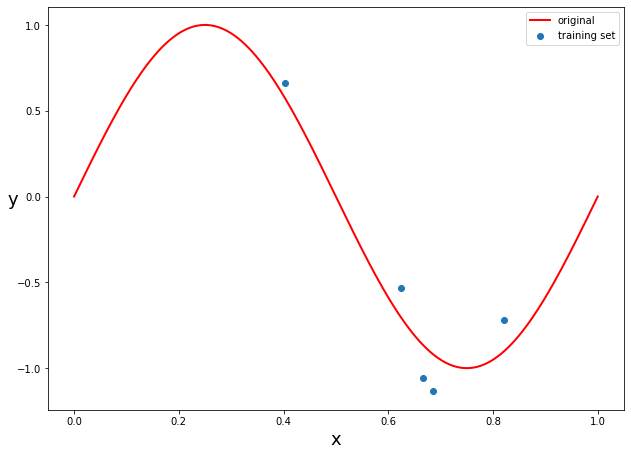

In [247]:
# Data Generation
N = 5
sigma_eta = np.sqrt(0.1)
eta  = sigma_eta*np.random.randn(N, 1)

x_n = np.random.rand(N, 1)
Y = np.sin(2*np.pi*x_n) + eta


# plotting the training set and the original model
#original model
x = np.linspace(0,1,300)
y = np.sin(2*np.pi*x)
fig  = plt.figure(figsize = (10, 7))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 

axes.scatter(x_n, Y, label = "training set")
axes.plot(x, y, "r-", linewidth = 2, label = 'original')
axes.set_xlabel('x', fontsize = 18)
axes.set_ylabel('y', rotation = 0, fontsize = 18)
axes.legend(loc = 0)
plt.show()


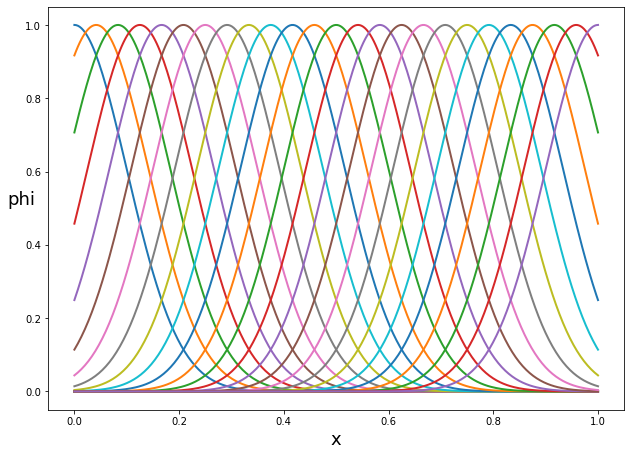

In [248]:
# define the basis functions
def phi_gauss(x, mean, sigma):
    return np.exp(-(x-mean)**2/(2*sigma**2))

M = 25
sigma  = np.sqrt(0.01)
mu_phi = np.linspace(0, 1, M)

phiG_list = []
for idx, mu in enumerate(mu_phi):
    phi_x = phi_gauss(x, mu, sigma)
    phiG_list.append(phi_x)

phiG = np.vstack(phiG_list).T    

# ploting of the basis function
fig  = plt.figure(figsize = (10, 7))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(x, phiG, linewidth = 2)
axes.set_xlabel('x', fontsize = 18)
axes.set_ylabel('phi', rotation = 0, fontsize = 18)
plt.show()

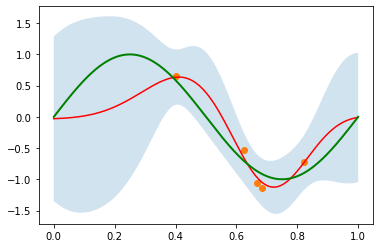

In [249]:
# Applicaton of Bayessian regression
# I firstly calculate the mean and the covariance of the posterior

# let us first create the design matrix
phi_list = []
for mu in mu_phi:
    phi_xn   = phi_gauss(x_n, mu, sigma)
    phi_list.append(phi_xn) 

PHI = np.concatenate(phi_list, axis =1)
PHI = np.concatenate((np.ones((N,1)), PHI), axis = 1)  # this is my design matrix

# posterior covariance
sigma_theta = np.sqrt(0.5)
mean_theta = np.zeros((M+1, 1))
Sigma_posterior = np.linalg.inv((1.0/sigma_theta**2)*np.eye(M+1)+(1.0/sigma_eta**2)*np.dot(PHI.T,PHI))

# posterior mean
mean_posterior = mean_theta + (1.0/sigma_eta**2)*np.dot(Sigma_posterior, PHI.T).dot(Y-np.dot(PHI, mean_theta))

# mean values of prediction
x1 = np.linspace(0,1,300)

phiGx1_list = []
for mu in mu_phi:
    phi_x1 = phi_gauss(x1, mu, sigma)
    phiGx1_list.append(phi_x1)

phiGx1 = np.vstack(phiG_list).T    
phiGx1 = np.concatenate((np.ones((300, 1)), phiGx1), axis = 1)
mu_y   = np.dot(phiGx1,mean_posterior).flatten()
var_y  = sigma_eta**2 + np.sum(np.dot(phiGx1, Sigma_posterior)*phiGx1, axis = 1) 

fig, ax = plt.subplots()
ax.plot(x1, mu_y, "r-")        
ax.fill_between(x1, (mu_y-np.sqrt(var_y)).flatten(), (mu_y+np.sqrt(var_y)).flatten(), alpha=0.2)
ax.scatter(x_n, Y, label = "training set")
ax.plot(x, y, "g-", linewidth = 2, label = 'original') 
plt.show()